# imports and constants

In [66]:
configs=  "N://TESE//Bullwhip//simulation_configuration.py"
import simulation_configuration  as sim_cfg


ModuleNotFoundError: No module named 'simulation_configuration'

In [ ]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt



FINAL_EXPORT_FILES_PATH = "N://TESE//Bullwhip//data//exports//"
files_in_folder = os.listdir(FINAL_EXPORT_FILES_PATH)
original_data = "N://TESE//Bullwhip//data//input//data_amplified.csv"


In [ ]:


inventory_files = {} 
i=0
for file in files_in_folder:
    if "inventory" in file:
        if "actor_" in file:
            inventory_files[f"actor_{i}"] = file
            i+=1
    
inventory_files
# orders_df= pd.read_csv(FINAL_EXPORT_FILES_PATH + orders[-1]) 
# transactions_df = pd.read_json(FINAL_EXPORT_FILES_PATH + transactions_files[-1])
# inventory_df = pd.read_json(FINAL_EXPORT_FILES_PATH + inventory_files[-1])

#remove space from column names
# orders_df.columns=orders_df.columns.str.lstrip()


{'actor_0': 'inventory_actor_0_20220916_122841.json',
 'actor_1': 'inventory_actor_1_20220916_122841.json',
 'actor_2': 'inventory_actor_2_20220916_122841.json',
 'actor_3': 'inventory_actor_3_20220916_122841.json',
 'actor_4': 'inventory_actor_4_20220916_122841.json',
 'actor_5': 'inventory_actor_5_20220916_122841.json'}

# Inventory

In [ ]:
def read_inventory_file(file_path):
    with open(file_path, "r") as file:
        data = file.read()
        data= data.replace("'",'"')[:-2].replace("\n",'').replace(" ",'')
        
        data = '{"data":[' + data + ']}'
        return data






In [138]:


inventories={}
for actor, inv in inventory_files.items():
    inicial_data = read_inventory_file(FINAL_EXPORT_FILES_PATH + inventory_files[actor])
    inventories[actor] = pd.read_json(inicial_data, orient="split")
    inventories[actor] = pd.concat([inventories[actor].drop(['inventory'], axis=1), inventories[actor]['inventory'].apply(pd.Series)], axis=1)


# for actor in inventories.values():
#     actor.plot(x='day')



day         66795.0
0               0.0
1001    346775243.0
dtype: float64

# Orders

In [76]:
orders_files = {} 
for file in files_in_folder:
    if "orders_closed" in file:
        if "actor_" in file:
            orders_files[ f"{file.split('2022')[0][:-1]}"] = file
    if "orders_open" in file:
        if "actor_" in file:
            orders_files[f"{file.split('2022')[0][:-1]}"] = file
orders_files            



""


In [79]:
orders={}
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(nrows=2, ncols=5)

# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])

for actor, inv in orders_files.items():
    headers= ["Criation_day"," Product", "Quantity", "Client"," Order_id", "Status", "Notes"]
    # df= pd.DataFrame(data, columns=headers)
    orders[actor] = pd.read_csv(FINAL_EXPORT_FILES_PATH + inv, names=headers , index_col=False)
    
# print(orders.keys())
i=0
j=0


def print_orders_plots():
    for actor, df in orders.items():
        print(actor)
        df.plot(x='Criation_day', y='Quantity', kind='scatter',  title=actor)
        # if i<6:
        #     i+=1
        # if i>=6:
        #     j=2


orders_combined = pd.concat(orders.values(), axis=0, ignore_index=True)

orders_combined

# inicial_data
# # for actor in inventories.values():
# #     actor.plot(x='day')

,Criation_day,Product,Quantity,Client,Order_id,Status,Notes
0,16,1001,11763,0,1000001,9,{}
1,16,1001,11783,0,1000002,9,{}
2,16,1001,11771,0,1000003,9,{}
3,16,1001,11833,0,1000004,9,{}
4,16,1001,11813,0,1000005,9,{}
...,...,...,...,...,...,...,...
540,2,5001,18887517,4,5000002,0,{}
541,3,5001,18888960,4,5000003,0,{}
542,4,5001,18890423,4,5000004,0,{}
543,5,5001,18891904,4,5000005,0,{}


In [ ]:
# orders_df[orders_df.Client == 2]["Quantity"].plot()

In [ ]:
client_3 = orders_df[orders_df.Client == 3]["Quantity"]
# client_3

In [ ]:



# client_1 = orders_df[orders_df.Client == 1]["Quantity"]
# client_2 = orders_df[orders_df.Client == 2]["Quantity"]
# client_3 = orders_df[orders_df.Client == 3]["Quantity"]
# client_4 = orders_df[orders_df.Client == 4]["Quantity"]
# # orders_client["Quantity"].plot()
# # print("Client: ", client)
# # print("")
# # orders_client.plot(subplots=True, layout=(1,2))

# #define number of rows and columns for subplots
# nrow=2
# ncol=2
# df_list = [client_1 ,client_2, client_3, client_4]
# fig, axes = plt.subplots(nrow, ncol)

# # plot counter
# count=0
# for r in range(nrow):
#     for c in range(ncol):
#         df_list[count].plot(ax=axes[r,c], figsize=(20  ,20))
#         count+=1


In [ ]:
orders_df

# Transactions

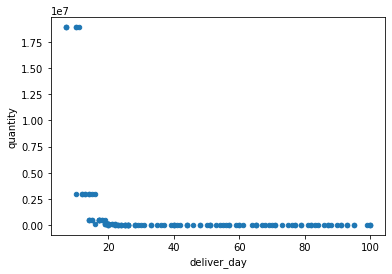

In [70]:
for file in files_in_folder:
    if "transactions_closed" in file:
        trans_data=read_inventory_file((FINAL_EXPORT_FILES_PATH + file))
transactions = pd.read_json(trans_data, orient="split")
# inventories[actor] = pd.concat([inventories[actor].drop(['inventory'], axis=1), inventories[actor]['inventory'].apply(pd.Series)], axis=1)
transactions.sort_values(by=["deliver_day", "receiver"], inplace=True)
transactions.plot(x='deliver_day', y='quantity', kind='scatter')
transactions.index = transactions["transaction_id"]

Métricas para exportar

In [90]:
total_transaction_quantity = transactions[["quantity"]].sum()
avg_transaction_quantity = transactions[["quantity"]].mean()
std_transaction_quantity = transactions[["quantity"]].std()


avg_transactions_leadtime = transactions[["lead_time"]].mean()
std_transactions_leadtime = transactions[["lead_time"]].std()

transactions.describe()

,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,theoretical_lead,update_day,transaction_id,delivered
count,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,42.437956,1.671567e+06,34.613139,37.094891,0.671533,1.671533,1672.532847,1.084543e+06,7.824818,8.861314,7.824818,43.474453,69.000000,1.0
std,27.576861,1.157500e+06,29.654195,27.441618,1.157517,1.157517,1157.516923,3.894734e+06,4.078094,4.776139,4.078094,26.743630,39.692569,0.0
min,7.000000,1.000001e+06,1.000000,1.000000,0.000000,1.000000,1001.000000,1.163400e+04,3.000000,3.000000,3.000000,7.000000,1.000000,1.0
25%,20.000000,1.000035e+06,8.000000,15.000000,0.000000,1.000000,1001.000000,1.179500e+04,5.000000,5.000000,5.000000,23.000000,35.000000,1.0
50%,31.000000,1.000069e+06,26.000000,26.000000,0.000000,1.000000,1001.000000,1.188200e+04,6.000000,6.000000,6.000000,32.000000,69.000000,1.0
75%,65.000000,2.000009e+06,60.000000,60.000000,1.000000,2.000000,2001.000000,7.485200e+04,9.000000,13.000000,9.000000,65.000000,103.000000,1.0
max,100.000000,5.000006e+06,94.000000,94.000000,4.000000,5.000000,5001.000000,1.889341e+07,21.000000,21.000000,21.000000,100.000000,137.000000,1.0


In [129]:
orders_combined.describe()

avg_orders_site = orders_combined[["Quantity"]].mean()
avg_orders_site = orders_combined[["Quantity"]].std()


,Criation_day,Product,Quantity,Client,Order_id,Status,Notes
0,16,1001,11763,0,1000001,9,{}
1,16,1001,11783,0,1000002,9,{}
2,16,1001,11771,0,1000003,9,{}
3,16,1001,11833,0,1000004,9,{}
4,16,1001,11813,0,1000005,9,{}
...,...,...,...,...,...,...,...
540,2,5001,18887517,4,5000002,0,{}
541,3,5001,18888960,4,5000003,0,{}
542,4,5001,18890423,4,5000004,0,{}
543,5,5001,18891904,4,5000005,0,{}


In [205]:
# total_transaction_quantit
avg_transaction_quantity 
std_transaction_quantity 
avg_transactions_leadtime
std_transactions_leadtime

print( "\n"
      "|-------> Transações\n"
    f"Lead Time - média: {avg_transactions_leadtime[0]:,.{0}f} dias\n".replace(',', ' ')+
    f"Lead Time - std: {std_transactions_leadtime[0]:,.{0}f} dias\n".replace(',', ' ')+
    f"Quantidade encomendada - avg: {transactions[['quantity']].mean()[0]:,.{0}f} dias\n".replace(',', ' ')+
    f"Quantidade encomendada - std: {transactions[['quantity']].std()[0]:,.{0}f} dias \n".replace(',', ' ')+
    f"Quantidade encomendada - min: {transactions[['quantity']].min()[0]:,.{0}f} dias \n".replace(',', ' ')+
    f"Quantidade encomendada - max: {transactions[['quantity']].max()[0]:,.{0}f} dias \n".replace(',', ' ')+
    f"Quantidade encomendada total: {transactions[['quantity']].sum()[0]:,.{0}f} dias \n".replace(',', ' ')
    )
    
    
# for actor, inv in inventories.items():
#     print(actor, f"Inventário médio : {inventories[actor].mean()[0]:,.{0}f} unidades \n".replace(',', ' ')+
#           actor, f"Inventário máximo : {inventories[actor].max()[0]:,.{0}f} unidades \n".replace(',', ' '))

print("|-------> Inventários ")
for actor, inv in inventories.items():
    # print("a",actor)
    for col in inventories[actor].columns:
        # print(col,"----------------------------------------")
        if col != "day":
            # print("a", actor, "c", col, "d",  inventories[actor])
            print(f"{actor} {col} -média: {inventories[actor][col].mean():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -máximo: {inventories[actor][col].max():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -mínimo: {inventories[actor][col].min():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -desvio padrão: {inventories[actor][col].std():,.{0}f} unidades \n".replace(',', ' ')+
              f"{actor} {col} -total: {inventories[actor][col].sum():,.{0}f} unidades\n".replace(',', ' ')
              )


|-------> Transações
Lead Time - média: 9 dias
Lead Time - std: 5 dias
Quantidade encomendada - avg: 1 084 543 dias
Quantidade encomendada - std: 3 894 734 dias 
Quantidade encomendada - min: 11 634 dias 
Quantidade encomendada - max: 18 893 411 dias 
Quantidade encomendada total: 148 582 441 dias 

|-------> Inventários 
actor_0 0 -média: 0 unidades 
actor_0 0 -máximo: 0 unidades 
actor_0 0 -mínimo: 0 unidades 
actor_0 0 -desvio padrão: 0 unidades 
actor_0 0 -total: 0 unidades

actor_0 1001 -média: 1 002 241 unidades 
actor_0 1001 -máximo: 1 114 142 unidades 
actor_0 1001 -mínimo: 35 347 unidades 
actor_0 1001 -desvio padrão: 246 649 unidades 
actor_0 1001 -total: 346 775 243 unidades

actor_1 1001 -média: 81 491 unidades 
actor_1 1001 -máximo: 742 543 unidades 
actor_1 1001 -mínimo: 0 unidades 
actor_1 1001 -desvio padrão: 176 746 unidades 
actor_1 1001 -total: 29 744 363 unidades

actor_1 2001 -média: 0 unidades 
actor_1 2001 -máximo: 0 unidades 
actor_1 2001 -mínimo: 0 unidades 
a